In [21]:
# i stole this from the solutions to make it easier to finish up
from iznetwork import IzNetwork
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rn

# Question 1a

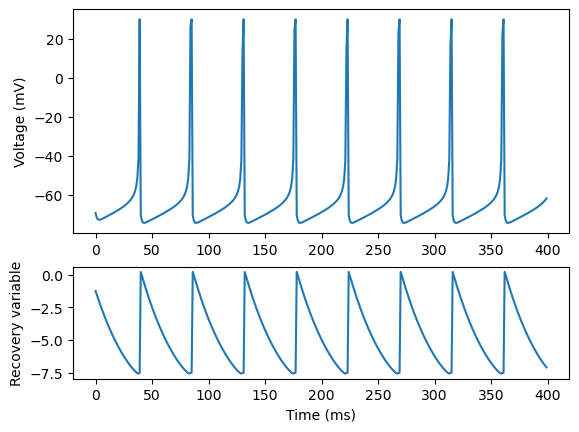

In [16]:

net = IzNetwork(1, 1)
net.setWeights(np.array([[0]]))
net.setDelays(np.array([[1]]))
net.setParameters(np.array([0.02]), np.array([0.2]), np.array([-65]), np.array([8]))

I = np.array([10])
T = 400
V = np.zeros(T)
U = np.zeros(T)
for t in range(T):
    net.setCurrent(I)
    net.update()
    V[t] = net.getState()[0][0]
    U[t] = net.getState()[1][0]

f, (a0, a1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [2, 1]})
a0.plot(V)
a0.set_ylabel('Voltage (mV)')
a1.plot(U)
a1.set_ylabel('Recovery variable')
a1.set_xlabel('Time (ms)')
plt.show()

# Question 1b

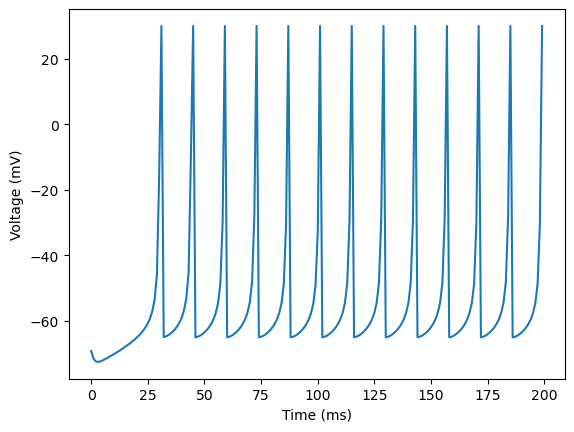

In [18]:
net = IzNetwork(1, 1)
net.setWeights(np.array([[0]]))
net.setDelays(np.array([[1]]))
net.setParameters(np.array([0.02]), np.array([0.25]), np.array([-65]), np.array([2]))

I = np.array([10])
T = 200
V = np.zeros(T)
for t in range(T):
    net.setCurrent(I)
    net.update()
    V[t] = net.getState()[0][0]

plt.plot(V)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.show()

# Question 1c

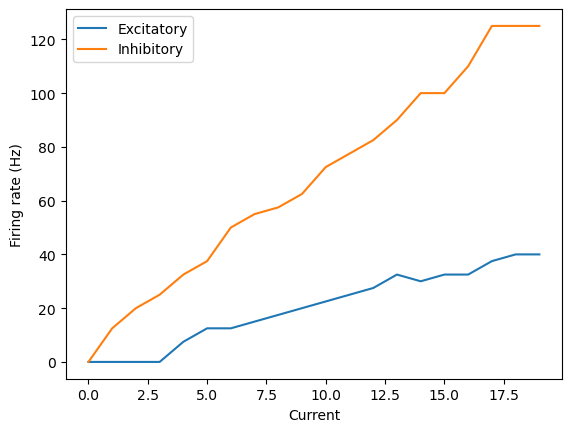

In [19]:
def run_simulation(neuron_type, I, transient, duration):
    """
    Utility function to set up a network of a given neuron type, run a
    simulation and record the resulting average firing rate.

    Inputs:
    neuron_type  -- str. Can be 'excitatory' or 'inhibitory'

    I            -- np.array. Constant current to feed the network

    transient    -- int. Number of timesteps (ms) to discard at the start

    duration     -- int. Number of timesteps (ms) to simulate while recording

    Returns:
    firing_rate  -- float
    """
    # First, determine the type of neuron and set parameters accordingly
    if neuron_type == 'excitatory':
        params = {'a': np.array([0.02]), 'b': np.array([0.2]), 'c': np.array([-65]), 'd': np.array([8])}
    elif neuron_type == 'inhibitory':
        params = {'a': np.array([0.02]), 'b': np.array([0.25]), 'c': np.array([-65]), 'd': np.array([2])}
    else:
        raise ValueError('Unknown neuron type.')

    # Initialise the network
    net = IzNetwork(1, 1)
    net.setWeights(np.array([[0]]))
    net.setDelays(np.array([[1]]))
    net.setParameters(**params)
    npI = np.array([I])

    # Run the simulation for some transient time, without recording activity
    for t in range(transient):
        net.setCurrent(npI)
        net.update()

    # Now run again, this time recording the number of spikes
    spike_count = 0
    for t in range(duration):
        net.setCurrent(npI)
        net.update()
        if net.getState()[0][0] > 29:
            spike_count += 1

    # Convert the result to a firing rate in Hertz and return
    firing_rate = spike_count*1000/duration

    return firing_rate

T1 = 100
T2 = 400
I_vec = np.arange(0, 20, 1)

ex_f = list(map(lambda I: run_simulation('excitatory', I, transient=T1, duration=T2), I_vec))
in_f = list(map(lambda I: run_simulation('inhibitory', I, transient=T1, duration=T2), I_vec))

plt.plot(I_vec, ex_f, label='Excitatory')
plt.plot(I_vec, in_f, label='Inhibitory')
plt.legend()
plt.xlabel('Current')
plt.ylabel('Firing rate (Hz)')
plt.show()

# Question 2b

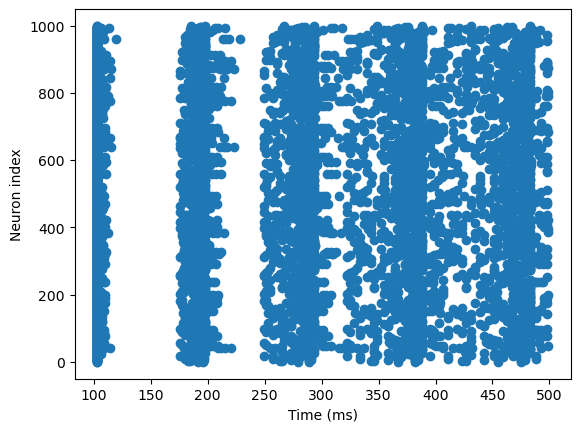

In [ ]:
N_excitatory = 800
N_inhibitory = 200
N = N_excitatory + N_inhibitory
Dmax = 1
net = IzNetwork(N, Dmax)

# Set connectivity and delay matrices
W = np.zeros((N,N))
D = np.ones((N,N), dtype=int)

# excitatory regular spiking
r_excitatory = rn.rand(N_excitatory)
a_excitatory = 0.02*np.ones(N_excitatory)
b_excitatory = 0.2*np.ones(N_excitatory)
c_excitatory = -65 + 15*(r_excitatory**2)
d_excitatory = 8 - 6*(r_excitatory**2)

# inhibitory regular spiking
r_inhibitory = rn.rand(N_inhibitory)
a_inhibitory = 0.02*np.ones(N_inhibitory) + 0.08 * r_inhibitory
b_inhibitory = 0.25*np.ones(N_inhibitory) - 0.05 * r_inhibitory
c_inhibitory = -65 * np.ones(N_inhibitory)
d_inhibitory = 2 * np.ones(N_inhibitory)

#r = np.append(r_excitatory, r_inhibitory)
a = np.append(a_excitatory, a_inhibitory)
b = np.append(b_excitatory, b_inhibitory)
c = np.append(c_excitatory, c_inhibitory)
d = np.append(d_excitatory, d_inhibitory)



net.setWeights(W)
net.setDelays(D)
net.setParameters(a, b, c, d)

T = 500
V = np.zeros((T, N))
for t in range(T):
    net.setCurrent(5*np.ones(N))
    net.update()
    V[t,:], _ = net.getState()

t, n = np.where(V > 29)
plt.scatter(t, n)
plt.xlabel('Time (ms)')
plt.ylabel('Neuron index')
plt.show()